In [2]:
!pip install xgboost
!pip install lightgbm
!pip install graphviz

  Using cached xgboost-1.6.2-py3-none-manylinux2014_x86_64.whl (255.9 MB)
  Using cached lightgbm-3.3.5-py3-none-manylinux1_x86_64.whl (2.0 MB)
  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)


In [3]:
import pandas as pd
import numpy as np
import math
import json
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.metrics import f1_score, recall_score
from sklearn.ensemble import RandomForestClassifier


%matplotlib inline

complete_df = pd.read_csv('data/complete.csv')
transaction_with_labels = pd.read_csv('data/transaction_with_labels.csv')

In [5]:
transaction_with_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148673 entries, 0 to 148672
Data columns (total 35 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   age                      148673 non-null  int64  
 1   gender                   148673 non-null  object 
 2   income                   148673 non-null  float64
 3   became_member_on         148673 non-null  object 
 4   membership_duration      148673 non-null  int64  
 5   person                   148673 non-null  object 
 6   event                    148673 non-null  object 
 7   time                     148673 non-null  int64  
 8   amount_spent             148673 non-null  float64
 9   offer_received           148673 non-null  int64  
 10  time_received            148673 non-null  int64  
 11  offer_id                 148673 non-null  object 
 12  offer_viewed             148673 non-null  int64  
 13  time_viewed              148673 non-null  float64
 14  offe

In [4]:
transaction_with_labels.drop(['time_viewed', 'time_received', 'time_completed', 
                    'offer_received', 'offer_viewed', 'offer_completed', 
                    'reward_received', 'became_member_on', 'person', 'channels', 
                    'offer_id', 'duration_diff', 'received_viewed', 'viewed_completed', 
                    'received_completed_diff',  'duration_hr', 'duration_diff', 'valid_complete',
                    'label', 'event', 'time'], axis = 1, inplace = True)

In [5]:
transaction_with_labels.head()

,age,gender,income,membership_duration,amount_spent,offer,offer_type,difficulty,duration,reward,web,email,social,mobile,completed
0,75,F,100000.0,443,19.89,4,bogo,5,7,5,1,1,0,1,1.0
1,65,M,53000.0,167,9.54,9,bogo,5,5,5,1,1,1,1,1.0
2,58,M,51000.0,257,2.32,3,informational,0,4,0,1,1,0,1,0.0
3,58,M,51000.0,257,2.32,6,discount,7,7,3,1,1,1,1,0.0
4,61,F,57000.0,318,12.33,2,bogo,10,5,10,1,1,1,1,1.0


In [6]:
transaction_with_labels['offer'].astype('category')

0        4
1        9
2        3
3        6
4        2
        ..
20931    2
20932    6
20933    8
20934    3
20935    6
Name: offer, Length: 20936, dtype: category
Categories (10, int64): [1, 2, 3, 4, ..., 7, 8, 9, 10]

In [7]:
def _transform_column_into_dummies(dataframe, names_of_column):
    
    to_concat = [dataframe]
    
    for name in names_of_column:
        dummies = pd.get_dummies(dataframe[name], prefix=f"{name} = ")
        to_concat.append(dummies)
    
    dataframe = pd.concat(to_concat, axis=1)
    
    dataframe = dataframe.drop(names_of_column, axis=1)
    
    return dataframe

transaction_with_labels = _transform_column_into_dummies(transaction_with_labels, ['offer_type', 'gender'])

In [8]:
X = transaction_with_labels.drop('completed', axis = 1)
y = transaction_with_labels['completed']

In [9]:
# X.to_csv('data/X.csv', index = False)
# y.to_csv('data/y.csv', index = False)

In [10]:
X.columns

Index(['age', 'income', 'membership_duration', 'amount_spent', 'offer',
       'difficulty', 'duration', 'reward', 'web', 'email', 'social', 'mobile',
       'offer_type = _bogo', 'offer_type = _discount',
       'offer_type = _informational', 'gender = _F', 'gender = _M',
       'gender = _O'],
      dtype='object')

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle = True)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1, shuffle = True) # 0.25 x 0.8 = 0.2

In [12]:
from sklearn import tree
tree_clf = tree.DecisionTreeClassifier()
tree_clf = tree_clf.fit(X_train, y_train)

In [13]:
tree_pred = tree_clf.predict(X_test)

In [14]:
tree_f1 = f1_score(tree_pred, y_test)

In [15]:
tree_recall = recall_score(tree_pred, y_test) 

In [16]:
print(tree_f1, tree_recall)

0.6760667903525047 0.6773234200743494


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

Text(50.722222222222214, 0.5, 'True labels')

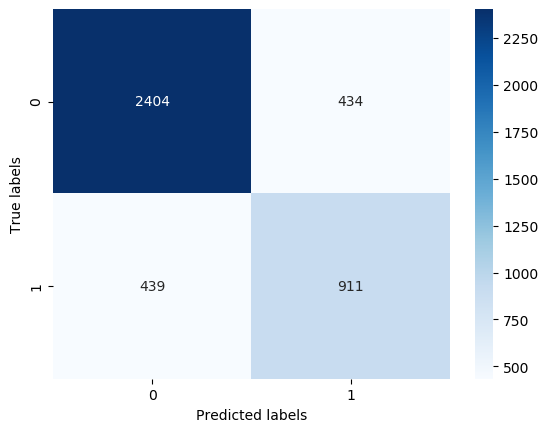

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# calculate confusion matrix
tree_cm = confusion_matrix(y_test, tree_pred)

# plot confusion matrix using seaborn heatmap
sns.heatmap(tree_cm, annot=True, cmap='Blues', fmt='g')

# set axis labels
plt.xlabel('Predicted labels')
plt.ylabel('True labels')


Feature ranking:
1. feature 3 age (0.362618)
2. feature 2 income (0.156656)
3. feature 6 membership_duration (0.125171)
4. feature 1 amount_spent (0.106965)
5. feature 0 offer (0.090120)
6. feature 7 difficulty (0.050041)
7. feature 4 duration (0.035565)
8. feature 13 reward (0.019812)
9. feature 5 web (0.015895)
10. feature 16 email (0.009770)
11. feature 14 social (0.009638)
12. feature 15 mobile (0.006621)
13. feature 10 offer_type = _bogo (0.005930)
14. feature 8 offer_type = _discount (0.002655)
15. feature 17 offer_type = _informational (0.002543)
16. feature 9 gender = _F (0.000000)
17. feature 11 gender = _M (0.000000)
18. feature 12 gender = _O (0.000000)


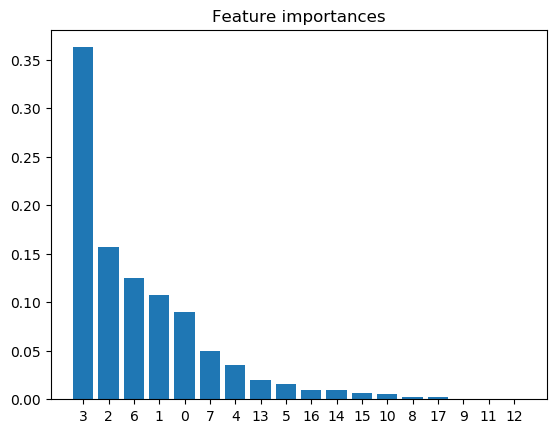

In [19]:
# get feature importances
tree_importances = tree_clf.feature_importances_

# sort feature importances in descending order
indices = np.argsort(tree_importances)[::-1]

# print out the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], X.columns[f], tree_importances[indices[f]]))

# plot the feature importances
plt.title("Feature importances")
plt.bar(range(X.shape[1]), tree_importances[indices])
plt.xticks(range(X.shape[1]), indices)
plt.show()


In [20]:
forest_clf = RandomForestClassifier(max_depth=2, random_state=0)
forest_clf = forest_clf.fit(X_train, y_train)

In [21]:
forest_pred = forest_clf.predict(X_test)

In [22]:
forest_f1 = f1_score(forest_pred, y_test)

In [23]:
forest_recall = recall_score(forest_pred, y_test)

In [24]:
print(forest_f1, forest_recall)

0.47915620291310895 0.7441497659906396


Text(50.722222222222214, 0.5, 'True labels')

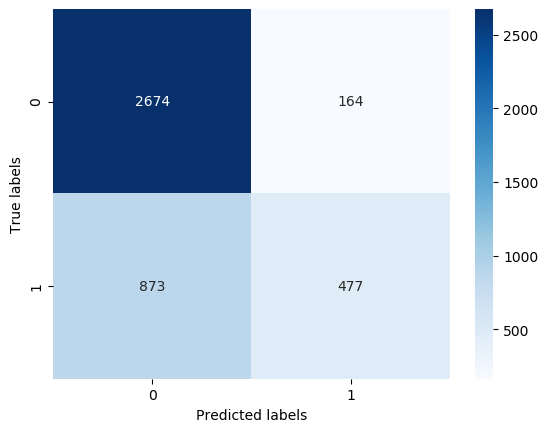

In [25]:
# calculate confusion matrix
forest_cm = confusion_matrix(y_test, forest_pred)

# plot confusion matrix using seaborn heatmap
sns.heatmap(forest_cm, annot=True, cmap='Blues', fmt='g')

# set axis labels
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

Feature ranking:
1. feature 3 age (0.217322)
2. feature 7 income (0.163001)
3. feature 6 membership_duration (0.130565)
4. feature 5 amount_spent (0.124036)
5. feature 14 offer (0.113318)
6. feature 1 difficulty (0.092899)
7. feature 2 duration (0.059315)
8. feature 4 reward (0.026244)
9. feature 10 web (0.019693)
10. feature 11 email (0.016385)
11. feature 16 social (0.010679)
12. feature 12 mobile (0.009756)
13. feature 8 offer_type = _bogo (0.008093)
14. feature 13 offer_type = _discount (0.007197)
15. feature 0 offer_type = _informational (0.001486)
16. feature 15 gender = _F (0.000010)
17. feature 17 gender = _M (0.000002)
18. feature 9 gender = _O (0.000000)


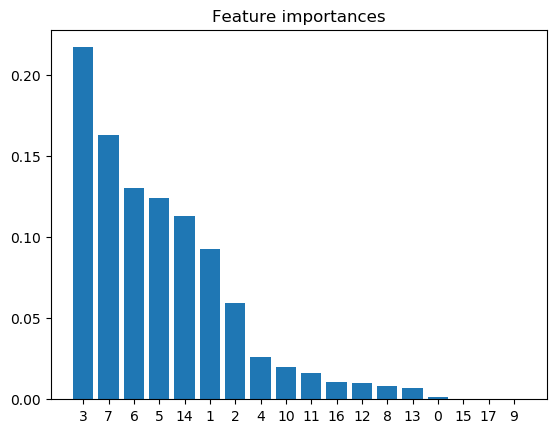

In [26]:
# get feature importances
forest_importances = forest_clf.feature_importances_

# sort feature importances in descending order
indices = np.argsort(forest_importances)[::-1]

# print out the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], X.columns[f], forest_importances[indices[f]]))

# plot the feature importances
plt.title("Feature importances")
plt.bar(range(X.shape[1]), forest_importances[indices])
plt.xticks(range(X.shape[1]), indices)
plt.show()


In [27]:
import lightgbm as lgb
lgb_clf = lgb.LGBMClassifier()
lgb_clf = lgb_clf.fit(X_train, y_train)

In [28]:
lgb_pred = lgb_clf.predict(X_test)

In [29]:
lgb_f1 = f1_score(lgb_pred, y_test)

In [30]:
lgb_recall = recall_score(lgb_pred, y_test)

In [31]:
print(lgb_f1, lgb_recall)

0.7606049428255256 0.7575312270389419


Text(50.722222222222214, 0.5, 'True labels')

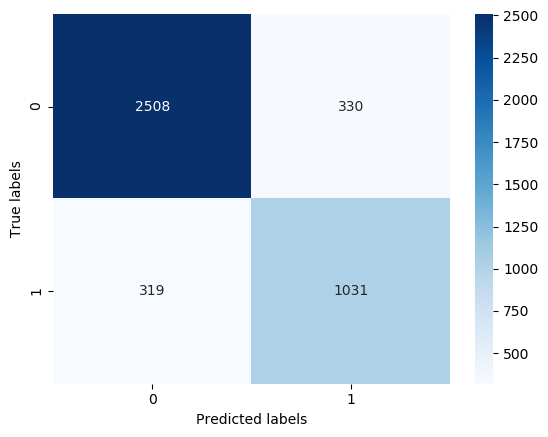

In [32]:
# calculate confusion matrix
lgb_cm = confusion_matrix(y_test, lgb_pred)

# plot confusion matrix using seaborn heatmap
sns.heatmap(lgb_cm, annot=True, cmap='Blues', fmt='g')

# set axis labels
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

Feature ranking:
1. feature 2 age (705.000000)
2. feature 3 income (635.000000)
3. feature 1 membership_duration (545.000000)
4. feature 0 amount_spent (477.000000)
5. feature 5 offer (178.000000)
6. feature 4 difficulty (172.000000)
7. feature 6 duration (76.000000)
8. feature 7 reward (53.000000)
9. feature 10 web (45.000000)
10. feature 15 email (42.000000)
11. feature 16 social (25.000000)
12. feature 17 mobile (23.000000)
13. feature 14 offer_type = _bogo (7.000000)
14. feature 8 offer_type = _discount (6.000000)
15. feature 13 offer_type = _informational (5.000000)
16. feature 11 gender = _F (4.000000)
17. feature 12 gender = _M (2.000000)
18. feature 9 gender = _O (0.000000)


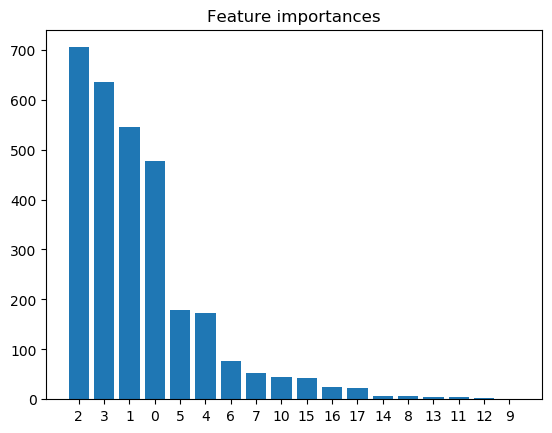

In [33]:
# get feature importances
lgb_importances = lgb_clf.feature_importances_

# sort feature importances in descending order
indices = np.argsort(lgb_importances)[::-1]

# print out the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], X.columns[f], lgb_importances[indices[f]]))

# plot the feature importances
plt.title("Feature importances")
plt.bar(range(X.shape[1]), lgb_importances[indices])
plt.xticks(range(X.shape[1]), indices)
plt.show()

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline

In [35]:
models = []
models.append(('DT', tree.DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('LGBM', lgb.LGBMClassifier()))

In [36]:
f1_results = []
f1_names = []
scoring = 'f1'
cv = KFold(n_splits=10, shuffle=True, random_state=1)

for name, model in models:
    trans = StandardScaler()
    pipeline = Pipeline(steps=[('t', trans), ('m', model)])
    cv_results = cross_val_score(pipeline, 
                                    X_train, 
                                    y_train, 
                                    scoring = scoring, 
                                    cv = cv)
    f1_results.append(abs(cv_results))
    f1_names.append(name)
    msg = "%s: %f (%f)" % (name, abs(cv_results.mean()), cv_results.std())
    print(abs(cv_results), msg)

[0.69191919 0.64175258 0.7080292  0.69729093 0.69767442 0.675
 0.66985646 0.68641975 0.6825     0.68797954] DT: 0.683842 (0.017588)
[0.73947368 0.72       0.7382716  0.73284314 0.72151899 0.72704082
 0.74135876 0.72350792 0.75800256 0.73342003] RF: 0.733544 (0.010901)
[0.76264591 0.72916667 0.75213675 0.76519666 0.75154512 0.75405743
 0.75910693 0.75878788 0.77664975 0.77427491] LGBM: 0.758357 (0.012687)


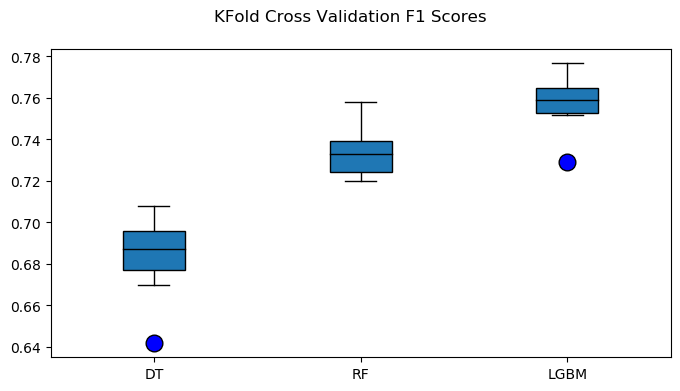

In [37]:
fig = plt.figure(figsize=(8,4))
fig.suptitle('KFold Cross Validation F1 Scores', color = 'black')
ax = fig.add_subplot(111)

plt.boxplot(f1_results, vert = True, patch_artist = True, manage_ticks = True,
            medianprops = {"color":'black'}, 
            whiskerprops = {"color": 'black'}, 
            capprops = {"color": 'black'}, 
            boxprops = {"color": 'black'}, 
            flierprops = {"marker":'o', 
                          "markerfacecolor":'b', 
                          "markersize": 12})

ax.set_xticklabels(f1_names)
# plt.show()
# plt.savefig(os.path.join('photos/kfold_f1.png'), dpi=300, format='png', bbox_inches='tight') 


In [38]:
recall_results = []
recall_names = []
scoring = 'recall'
cv = KFold(n_splits=10, shuffle=True, random_state=1)

for name, model in models:
    trans = StandardScaler()
    pipeline = Pipeline(steps=[('t', trans), ('m', model)])
    cv_results = cross_val_score(pipeline, 
                                    X_train, 
                                    y_train, 
                                    scoring = scoring, 
                                    cv = cv)
    recall_results.append(abs(cv_results))
    recall_names.append(name)
    msg = "%s: %f (%f)" % (name, abs(cv_results.mean()), cv_results.std())
    print(abs(cv_results), msg)

[0.68607595 0.64415584 0.71046229 0.68794326 0.70072993 0.65656566
 0.69856459 0.70822943 0.68274112 0.7038961 ] DT: 0.687936 (0.020933)
[0.72911392 0.71428571 0.72506083 0.71158392 0.69343066 0.72727273
 0.74401914 0.73566085 0.75126904 0.74805195] RF: 0.727975 (0.017093)
[0.7443038  0.72727273 0.74939173 0.75886525 0.73965937 0.76262626
 0.77272727 0.78054863 0.77664975 0.7974026 ] LGBM: 0.760945 (0.020257)


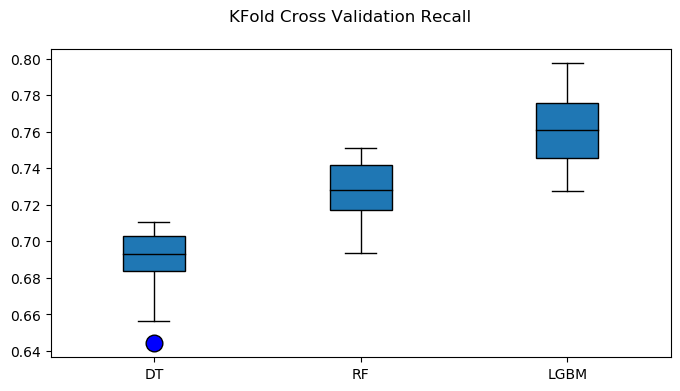

In [39]:
fig = plt.figure(figsize=(8,4))
fig.suptitle('KFold Cross Validation Recall', color = 'black')
ax = fig.add_subplot(111)

plt.boxplot(recall_results, vert = True, patch_artist = True, manage_ticks = True,
            medianprops = {"color":'black'}, 
            whiskerprops = {"color": 'black'}, 
            capprops = {"color": 'black'}, 
            boxprops = {"color": 'black'}, 
            flierprops = {"marker":'o', 
                          "markerfacecolor":'b', 
                          "markersize": 12})

ax.set_xticklabels(recall_names)
# plt.show()

# plt.savefig(os.path.join('photos/kfold_recall.png'), dpi=300, format='png', bbox_inches='tight') 


In [68]:
params = {'max_depth': [8,10,12],
          'num_leaves': [50, 60, 70],
          'min_data_in_leaf': [80, 90, 100]}

In [69]:
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb

lgb = lgb.LGBMClassifier()
clf = RandomizedSearchCV(estimator=lgb, 
                         param_distributions=params,
                         n_iter = 10,
                         scoring='recall',
                         cv = 10,
                         verbose=1)
clf.fit(X_val, y_val)
print("Best parameters:", clf.best_params_)
print("Best Recall: ", (clf.best_score_))

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] min

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    9.9s finished


In [ ]:
# Best parameters: {'num_leaves': 128, 'min_data_in_leaf': 100, 'max_depth': 5}
# Best Recall:  0.7538643194504079
# Best parameters: {'num_leaves': 256, 'min_data_in_leaf': 200, 'max_depth': 7}
# Best Recall:  0.7516852726492057
# Best parameters: {'num_leaves': 128, 'min_data_in_leaf': 200, 'max_depth': 10}
# Best Recall:  0.748754830399313
# Best parameters: {'num_leaves': 70, 'min_data_in_leaf': 100, 'max_depth': 5}
# Best Recall:  0.7538643194504079
# Best parameters: {'num_leaves': 60, 'min_data_in_leaf': 200, 'max_depth': 6}
# Best Recall:  0.7487709317303565
# Best parameters: {'num_leaves': 70, 'min_data_in_leaf': 100, 'max_depth': 6}
# Best Recall:  0.7516423357664233
# Best parameters: {'num_leaves': 40, 'min_data_in_leaf': 80, 'max_depth': 8}
# Best Recall:  0.7531397595534564
# Best parameters: {'num_leaves': 40, 'min_data_in_leaf': 70, 'max_depth': 8}
# Best Recall:  0.7560379991412624
# Best parameters: {'num_leaves': 60, 'min_data_in_leaf': 80, 'max_depth': 8}
# Best Recall:  0.7516691713181622
# Best parameters: {'num_leaves': 60, 'min_data_in_leaf': 90, 'max_depth': 10}
# Best Recall:  0.761179690854444
# Best parameters: {'num_leaves': 60, 'min_data_in_leaf': 90, 'max_depth': 10}
# Best Recall:  0.761179690854444


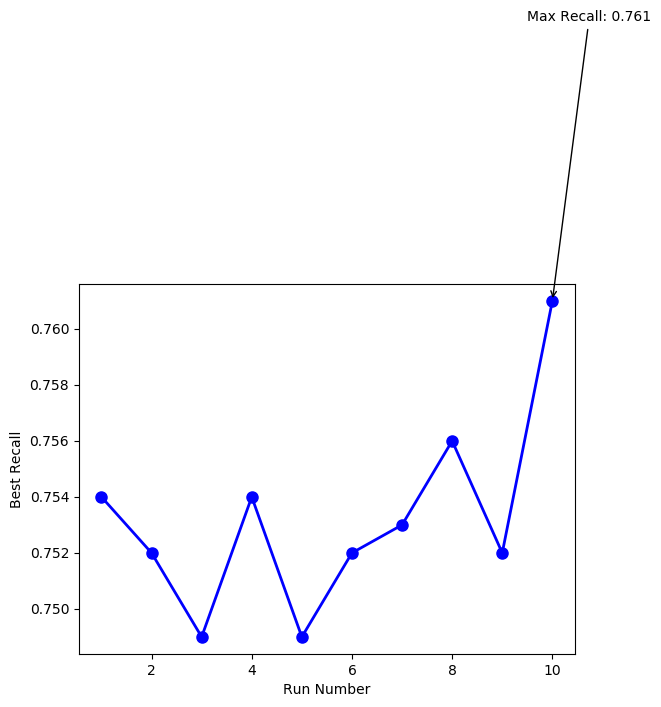

In [70]:
import matplotlib.pyplot as plt

best_recall = [0.754, 0.752, 0.749, 0.754, 0.749, 0.752, 0.753, 0.756, 0.752, 0.761]
runs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the line graph
ax.plot(runs, best_recall, '-o', color='blue', linewidth=2, markersize=8)

# Add text annotation for the highest value
max_recall = max(best_recall)
max_run = runs[best_recall.index(max_recall)]
ax.annotate(f'Max Recall: {max_recall:.3f}', xy=(max_run, max_recall), xytext=(max_run-0.5, max_recall+0.01),
            arrowprops=dict(facecolor='black', arrowstyle='->'))

# Set axis labels and title
ax.set_xlabel('Run Number')
ax.set_ylabel('Best Recall')

# Show the plot
plt.show()


In [71]:
import lightgbm as lgb

best_lgb = lgb.LGBMClassifier(num_leaves = 60, min_data_in_leaf = 90, max_depth = 10)

best_lgb.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=10,
               min_child_samples=20, min_child_weight=0.001,
               min_data_in_leaf=90, min_split_gain=0.0, n_estimators=100,
               n_jobs=-1, num_leaves=60, objective=None, random_state=None,
               reg_alpha=0.0, reg_lambda=0.0, silent='warn', subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [72]:
best_pred = best_lgb.predict(X_test)

In [73]:
best_pred_df = pd.DataFrame({'actual': y_test, 'predicted': best_pred})

In [74]:
best_pred_df = pd.merge(left = best_pred_df, right = X_test, how = "inner" , left_on = best_pred_df.index, right_on=X_test.index)

In [75]:
best_pred_df

,key_0,actual,predicted,age,income,membership_duration,amount_spent,offer,difficulty,duration,...,web,email,social,mobile,offer_type = _bogo,offer_type = _discount,offer_type = _informational,gender = _F,gender = _M,gender = _O
0,4127,0.0,0.0,31,51000.0,41,1.58,9,5,5,...,1,1,1,1,1,0,0,0,1,0
1,7935,1.0,1.0,49,99000.0,985,30.31,8,0,3,...,0,1,1,1,0,0,1,1,0,0
2,391,0.0,1.0,70,92000.0,259,18.38,3,0,4,...,1,1,0,1,0,0,1,1,0,0
3,6319,0.0,0.0,37,45000.0,91,5.30,9,5,5,...,1,1,1,1,1,0,0,1,0,0
4,11693,0.0,0.0,92,65000.0,866,2.97,2,10,5,...,1,1,1,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4183,10354,1.0,1.0,51,63000.0,1530,11.43,8,0,3,...,0,1,1,1,0,0,1,0,1,0
4184,12784,0.0,0.0,72,47000.0,96,0.98,3,0,4,...,1,1,0,1,0,0,1,0,1,0
4185,3442,1.0,1.0,53,75000.0,700,20.92,7,10,10,...,1,1,1,1,0,1,0,1,0,0
4186,18783,1.0,1.0,88,78000.0,970,20.84,9,5,5,...,1,1,1,1,1,0,0,1,0,0


In [76]:
# best_pred_df.to_csv('completed_offers_results.csv', index = False)

In [77]:
best_pred_df = pd.read_csv('completed_offers_results.csv')

In [78]:
best_pred_df

,key_0,actual,predicted,age,income,membership_duration,amount_spent,offer,difficulty,duration,...,web,email,social,mobile,offer_type = _bogo,offer_type = _discount,offer_type = _informational,gender = _F,gender = _M,gender = _O
0,4127,0.0,0.0,31,51000.0,41,1.58,9,5,5,...,1,1,1,1,1,0,0,0,1,0
1,7935,1.0,1.0,49,99000.0,985,30.31,8,0,3,...,0,1,1,1,0,0,1,1,0,0
2,391,0.0,1.0,70,92000.0,259,18.38,3,0,4,...,1,1,0,1,0,0,1,1,0,0
3,6319,0.0,0.0,37,45000.0,91,5.30,9,5,5,...,1,1,1,1,1,0,0,1,0,0
4,11693,0.0,0.0,92,65000.0,866,2.97,2,10,5,...,1,1,1,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4183,10354,1.0,1.0,51,63000.0,1530,11.43,8,0,3,...,0,1,1,1,0,0,1,0,1,0
4184,12784,0.0,0.0,72,47000.0,96,0.98,3,0,4,...,1,1,0,1,0,0,1,0,1,0
4185,3442,1.0,1.0,53,75000.0,700,20.92,7,10,10,...,1,1,1,1,0,1,0,1,0,0
4186,18783,1.0,1.0,88,78000.0,970,20.84,9,5,5,...,1,1,1,1,1,0,0,1,0,0


In [ ]:
for age_group in age_groups:
    # Get the subset of the DataFrame for the current age group
    subset = best_pred_df[best_pred_df['age_group'] == age_group]
    
    # Count the number of occurrences of each predicted value in the subset
    counts = subset['predicted'].value_counts()
    
    print(counts)

In [10]:
best_pred_df['predicted'].value_counts()

1.0    16590
0.0    13145
Name: predicted, dtype: int64

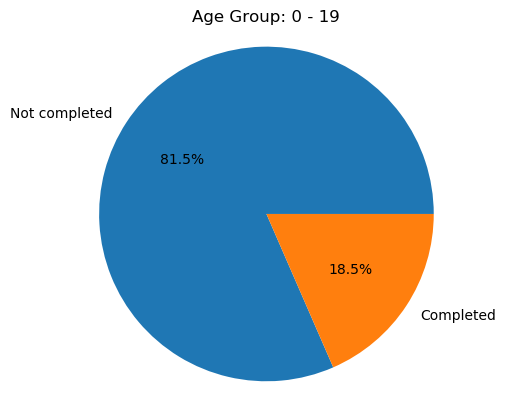

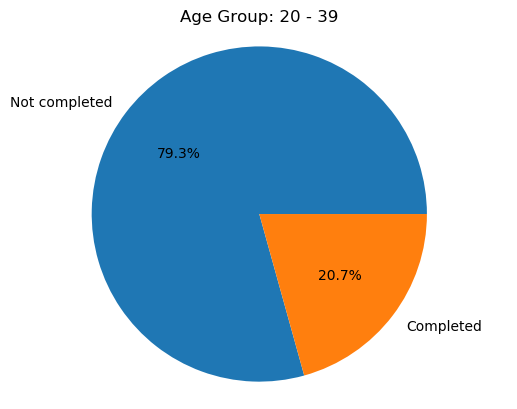

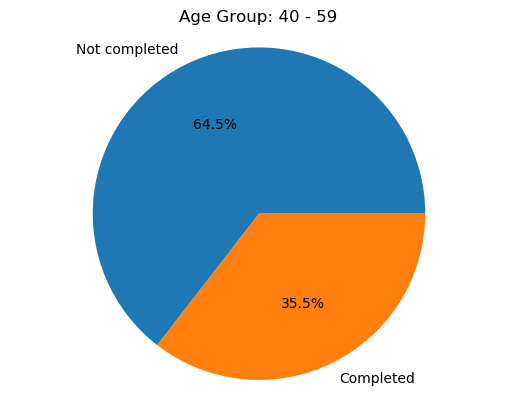

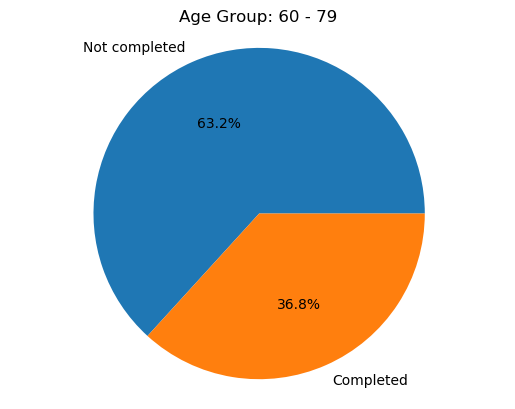

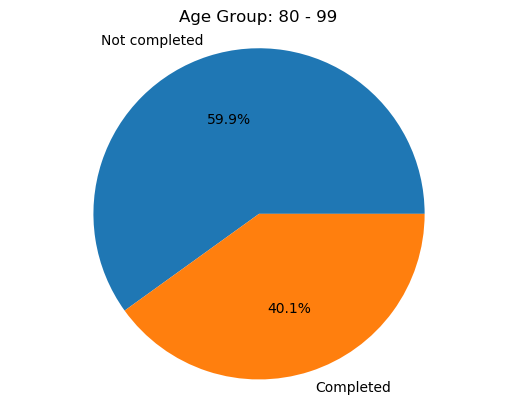

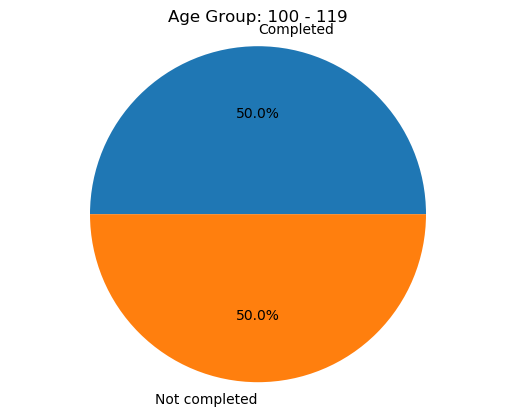

In [81]:
# Create age groups by rounding down to the nearest 20
best_pred_df['age_group'] = (best_pred_df['age'] // 20) * 20

# Create a list of unique age groups in the DataFrame, sorted in ascending order
age_groups = sorted(best_pred_df['age_group'].unique())

# Create a dictionary to map predicted values to labels for the pie charts
labels_dict = {0: 'Not completed', 1: 'Completed'}

# Create a pie chart for each age group and predicted value
for age_group in age_groups:
    # Get the subset of the DataFrame for the current age group
    subset = best_pred_df[best_pred_df['age_group'] == age_group]
    
    # Count the number of occurrences of each predicted value in the subset
    counts = subset['predicted'].value_counts()
    
    # Create a pie chart
    plt.figure()
    plt.pie(counts, labels=[labels_dict.get(x, '') for x in counts.index], autopct='%1.1f%%')
    plt.title('Age Group: {} - {}'.format(age_group, age_group+19))
    plt.axis('equal')
    # plt.savefig(os.path.join(f'photos/completed_age_{age_group}.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

plt.show()

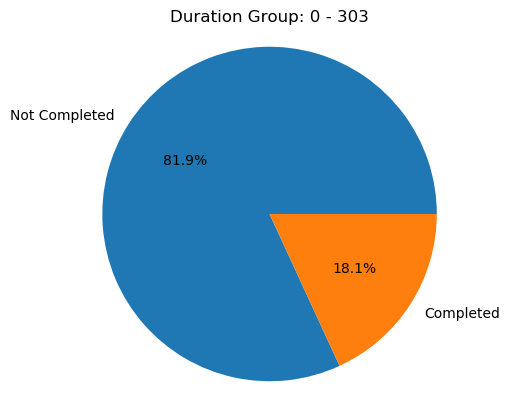

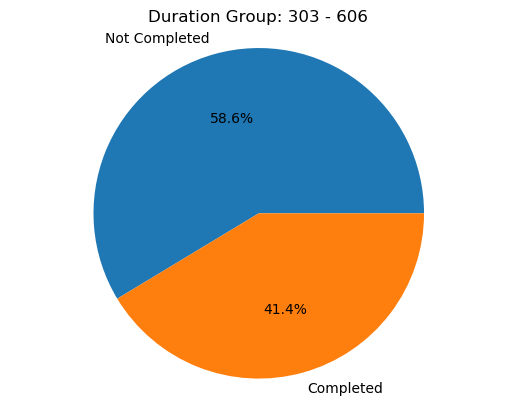

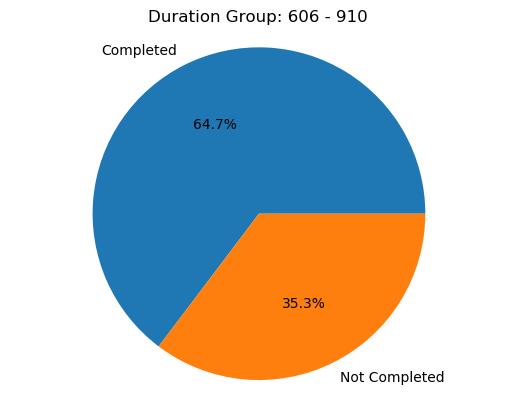

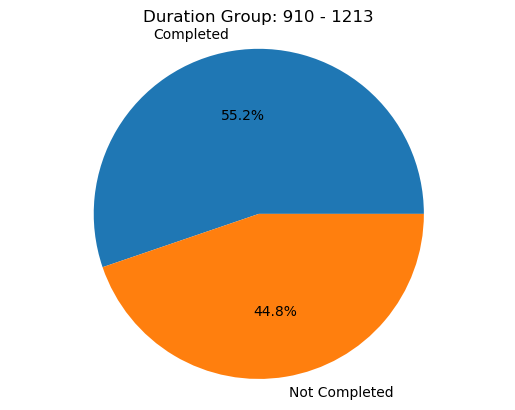

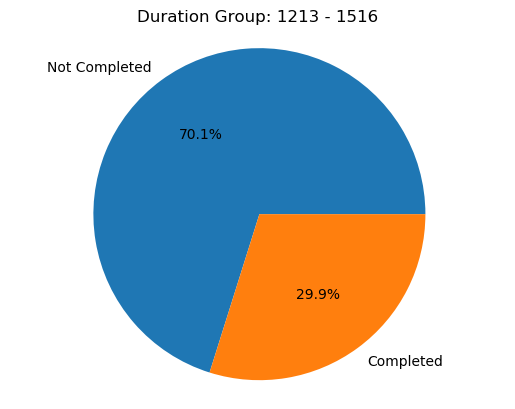

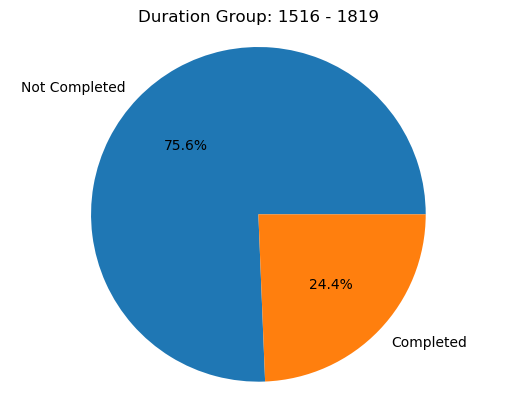

In [83]:
# Create a dictionary to map predicted values to labels for the pie charts
labels_dict = {0: 'Not Completed', 1: 'Completed'}

# Round off the membership duration column to the nearest integer
best_pred_df['membership_duration'] = best_pred_df['membership_duration'].round()

# Define the minimum and maximum membership duration values
min_duration = min(best_pred_df['membership_duration'])
max_duration = max(best_pred_df['membership_duration'])

# Define the number of membership duration groups
num_duration_groups = 6

# Calculate the membership duration range for each group
duration_range = (max_duration - min_duration) / num_duration_groups

# Create membership duration groups by rounding down to the nearest income range
best_pred_df['duration_group'] = (best_pred_df['membership_duration'] // duration_range) * duration_range

# Create a list of unique duration groups in the DataFrame, sorted in ascending order
duration_groups = sorted(best_pred_df['duration_group'].unique())

# Create a pie chart for each duration group and predicted value
for duration_group in duration_groups:
    # Get the subset of the DataFrame for the current duration group
    subset = best_pred_df[best_pred_df['duration_group'] == duration_group]
    
    # Count the number of occurrences of each predicted value in the subset
    counts = subset['predicted'].value_counts()
    
    # Round off the title values to the nearest integer
    duration_group_title = round(duration_group)
    duration_group_range_title = round(duration_group + duration_range)
    
    # Create a pie chart
    plt.figure()
    plt.pie(counts, labels=[labels_dict.get(x, '') for x in counts.index], autopct='%1.1f%%')
    plt.title('Duration Group: {} - {}'.format(duration_group_title, duration_group_range_title))
    plt.axis('equal')
    # plt.savefig(os.path.join(f'photos/completed_duration_{duration_group}.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures


plt.show()

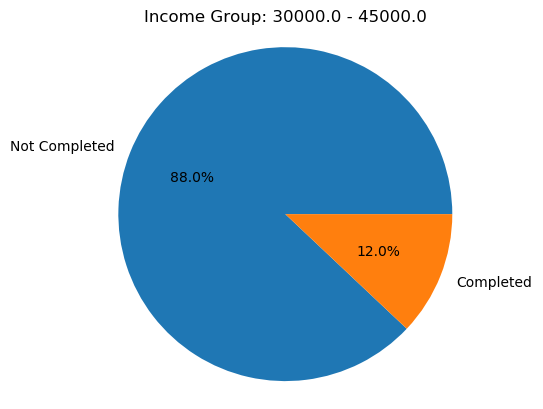

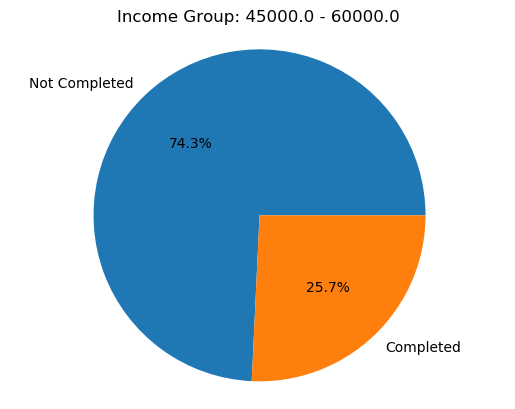

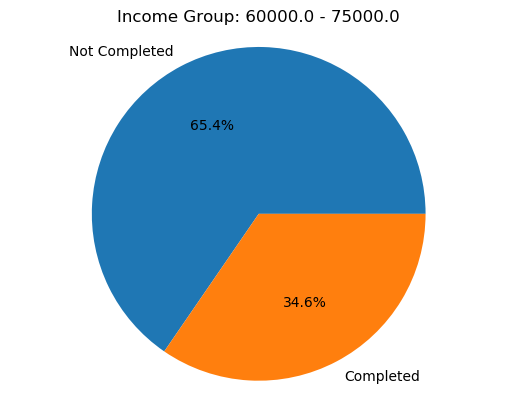

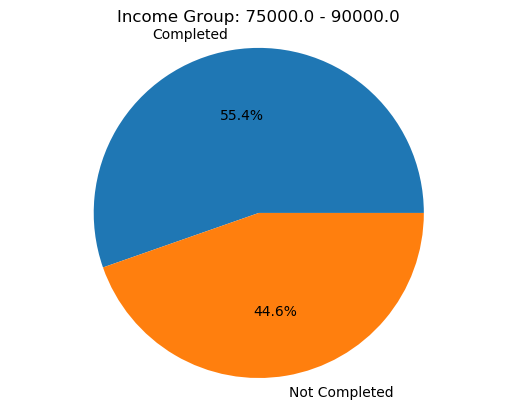

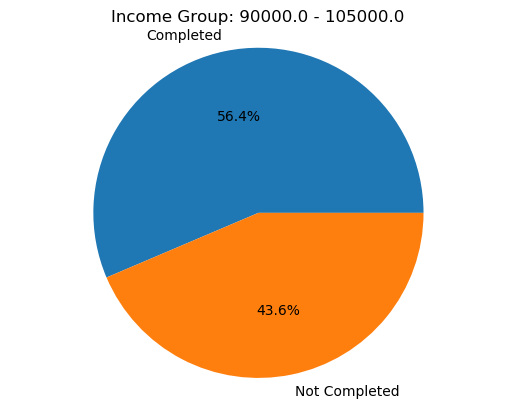

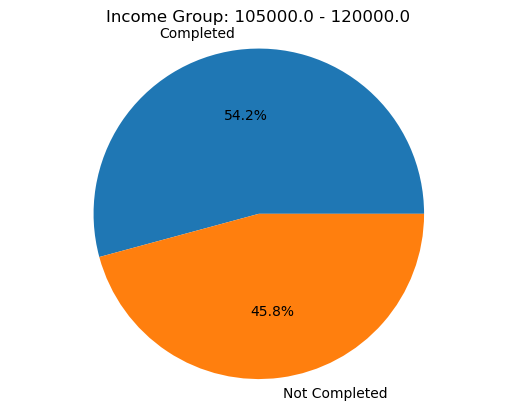

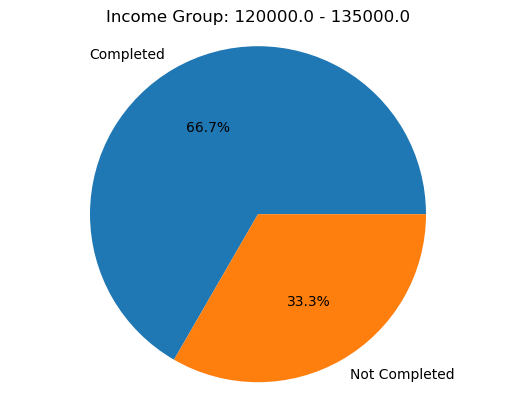

In [85]:
# Define the minimum and maximum income values
min_income = min(best_pred_df['income'])
max_income = max(best_pred_df['income'])

# Define the number of income groups
num_income_groups = 6

# Calculate the income range for each group
income_range = (max_income - min_income) / num_income_groups

# Create income groups by rounding down to the nearest income range
best_pred_df['income_group'] = (best_pred_df['income'] // income_range) * income_range

# Create a list of unique income groups in the DataFrame, sorted in ascending order
income_groups = sorted(best_pred_df['income_group'].unique())

# Create a dictionary to map predicted values to labels for the pie charts
labels_dict = {0: 'Not Completed', 1: 'Completed'}

# Create a pie chart for each income group and predicted value
for income_group in income_groups:
    # Get the subset of the DataFrame for the current income group
    subset = best_pred_df[best_pred_df['income_group'] == income_group]
    
    # Count the number of occurrences of each predicted value in the subset
    counts = subset['predicted'].value_counts()
    
    # Create a pie chart
    plt.figure()
    plt.pie(counts, labels=[labels_dict.get(x, '') for x in counts.index], autopct='%1.1f%%')
    plt.title('Income Group: {} - {}'.format(income_group, income_group+income_range))
    plt.axis('equal')
    # plt.savefig(os.path.join(f'photos/completed_income_{income_group}.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures


# plt.show()

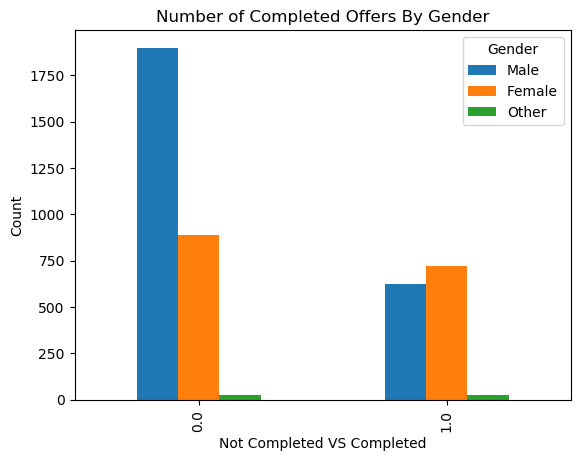

In [87]:
# Create a dictionary to map predicted values to labels for the pie charts
labels_dict = {0: 'Not Completed', 1: 'Completed'}

# Group the data by predicted value and sum the male, female, and other columns
counts = best_pred_df.groupby('predicted')[['gender = _M', 'gender = _F', 'gender = _O']].sum()

# Create a stacked bar chart
counts.plot(kind='bar')

# Set the title and axis labels
plt.title('Number of Completed Offers By Gender')
plt.xlabel('Not Completed VS Completed')
plt.ylabel('Count')

# Set the legend for the chart
plt.legend(title='Gender', labels=['Male', 'Female', 'Other'])

# plt.show()

plt.savefig(os.path.join(f'photos/completed_results_gender.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures


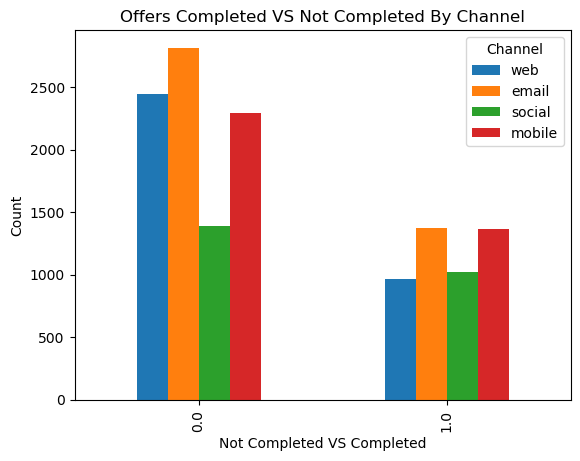

In [89]:
# Create a dictionary to map predicted values to labels for the pie charts
labels_dict = {0: 'Not Completed', 1: 'Completed'}

# Group the data by predicted value and sum the male, female, and other columns
counts = best_pred_df.groupby('predicted')[['web', 'email', 'social', 'mobile']].sum()

# Create a stacked bar chart
counts.plot(kind='bar')

# Set the title and axis labels
plt.title('Offers Completed VS Not Completed By Channel')
plt.xlabel('Not Completed VS Completed')
plt.ylabel('Count')

# Set the legend for the chart
plt.legend(title='Channel', labels=['web', 'email', 'social', 'mobile'])

# plt.show()

# plt.savefig(os.path.join(f'photos/completed_results_channel.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures


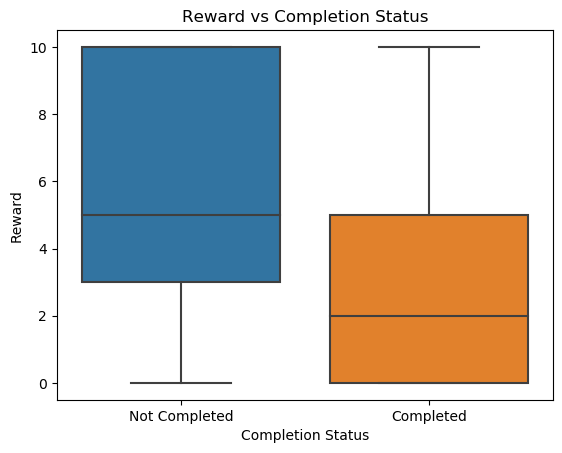

In [93]:
# Map predicted values to labels
labels_dict = {0: 'Not Completed', 1: 'Completed'}
best_pred_df['predicted_label'] = best_pred_df['predicted'].map(labels_dict)

# # Create box and whisker plots
# sns.boxplot(x='predicted_label', y='duration', data=best_pred_df)
# plt.title('Duration vs Completion Status')
# plt.xlabel('Completion Status')
# plt.ylabel('Duration')
# # plt.show()
# plt.savefig(os.path.join(f'photos/completed_duration.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures


# sns.boxplot(x='predicted_label', y='difficulty', data=best_pred_df)
# plt.title('Difficulty vs Completion Status')
# plt.xlabel('Completion Status')
# plt.ylabel('Difficulty')
# # plt.show()
# plt.savefig(os.path.join(f'photos/completed_difficulty.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures


# sns.boxplot(x='predicted_label', y='reward', data=best_pred_df)
# plt.title('Reward vs Completion Status')
# plt.xlabel('Completion Status')
# plt.ylabel('Reward')
# # plt.show()
# plt.savefig(os.path.join(f'photos/completed_reward.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures


In [94]:
best_pred_df.columns

Index(['key_0', 'actual', 'predicted', 'age', 'income', 'membership_duration',
       'amount_spent', 'offer', 'difficulty', 'duration', 'reward', 'web',
       'email', 'social', 'mobile', 'offer_type = _bogo',
       'offer_type = _discount', 'offer_type = _informational', 'gender = _F',
       'gender = _M', 'gender = _O', 'age_group', 'duration_group',
       'income_group', 'predicted_label'],
      dtype='object')

In [95]:
best_f1 = f1_score(y_test, best_pred)
best_recall = recall_score(y_test, best_pred)

print(best_f1, best_recall)

0.7523879500367378 0.7585185185185185


Text(50.722222222222214, 0.5, 'True labels')

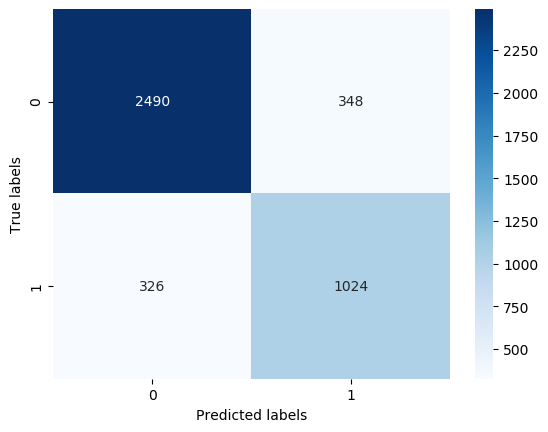

In [96]:
# calculate confusion matrix
best_cm = confusion_matrix(y_test, best_pred)

# plot confusion matrix using seaborn heatmap
sns.heatmap(best_cm, annot=True, cmap='Blues', fmt='g')

# set axis labels
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

Feature ranking:
1. feature 3 age (1191.000000)
2. feature 2 income (1101.000000)
3. feature 1 membership_duration (869.000000)
4. feature 0 amount_spent (831.000000)
5. feature 4 offer (262.000000)
6. feature 5 difficulty (233.000000)
7. feature 6 duration (91.000000)
8. feature 15 reward (74.000000)
9. feature 16 web (64.000000)
10. feature 7 email (55.000000)
11. feature 10 social (54.000000)
12. feature 17 mobile (21.000000)
13. feature 12 offer_type = _bogo (11.000000)
14. feature 13 offer_type = _discount (6.000000)
15. feature 8 offer_type = _informational (6.000000)
16. feature 14 gender = _F (5.000000)
17. feature 11 gender = _M (1.000000)
18. feature 9 gender = _O (0.000000)


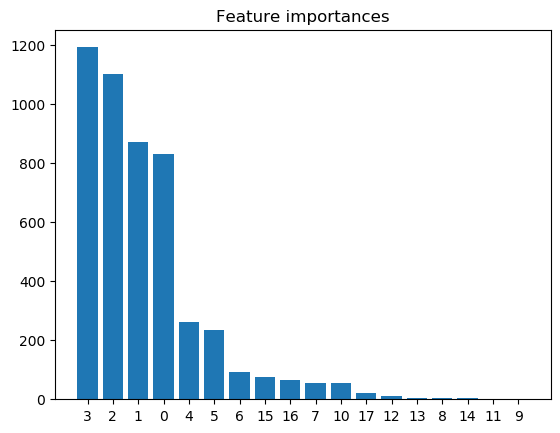

In [98]:
# get feature importances
best_importances = best_lgb.feature_importances_

# sort feature importances in descending order
indices = np.argsort(best_importances)[::-1]

# print out the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], X.columns[f], best_importances[indices[f]]))

# plot the feature importances
plt.title("Feature importances")
plt.bar(range(X.shape[1]), best_importances[indices])
plt.xticks(range(X.shape[1]), indices)
plt.show()
